In [8]:
import numpy as np

sigma = np.linspace(0, 10, 101)

In [23]:
Lambda = 1
y_targ = Lambda / (Lambda + sigma**2)
approx1 = Lambda / sigma**2
approx2 = Lambda / sigma**2 - Lambda **2 / sigma**4
approx3 = Lambda / sigma**2 - Lambda **2 / sigma**4 + Lambda **3 / sigma**6
M = 1
# approx0M = Lambda / (Lambda + M**2) * 
approx1M = Lambda / (Lambda + M**2) - Lambda * (sigma**2 - M**2) / (Lambda + M**2)**2

/tmp/ipykernel_3992922/3326141103.py:3: RuntimeWarning: divide by zero encountered in true_divide
  approx1 = Lambda / sigma**2
/tmp/ipykernel_3992922/3326141103.py:4: RuntimeWarning: divide by zero encountered in true_divide
  approx2 = Lambda / sigma**2 - Lambda **2 / sigma**4
/tmp/ipykernel_3992922/3326141103.py:4: RuntimeWarning: invalid value encountered in subtract
  approx2 = Lambda / sigma**2 - Lambda **2 / sigma**4
/tmp/ipykernel_3992922/3326141103.py:5: RuntimeWarning: divide by zero encountered in true_divide
  approx3 = Lambda / sigma**2 - Lambda **2 / sigma**4 + Lambda **3 / sigma**6
/tmp/ipykernel_3992922/3326141103.py:5: RuntimeWarning: invalid value encountered in subtract
  approx3 = Lambda / sigma**2 - Lambda **2 / sigma**4 + Lambda **3 / sigma**6


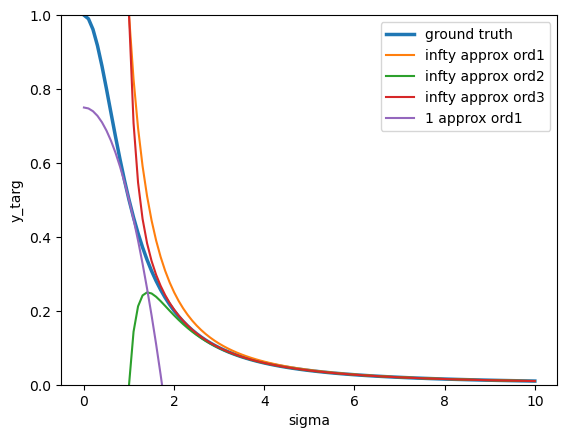

In [26]:
import matplotlib.pyplot as plt
plt.plot(sigma, y_targ, label='ground truth', lw=2.5)
plt.plot(sigma, approx1, label='infty approx ord1')
plt.plot(sigma, approx2, label='infty approx ord2')
plt.plot(sigma, approx3, label='infty approx ord3')
# plt.plot(sigma, approx0M, label=f'{M} approx ord0')
plt.plot(sigma, approx1M, label=f'{M} approx ord1')
plt.ylim(0, 1)
plt.xlabel('sigma')
plt.ylabel('y_targ')
plt.legend()
plt.show()


In [27]:
import sympy as sp

In [30]:
xs = sp.symbols('x1:6')

In [41]:
xs = sp.symbols('x1:6')
ys = sp.symbols('y1:6')
eps = sp.symbols('epsilon')
exp_xys = [sp.exp(eps * x + eps**2 * y) for x, y in zip(xs,ys)]
sftmax1 = exp_xys[0] / sum(exp_xys)

In [43]:
sp.expand(sftmax1, eps)

exp(epsilon*x1)*exp(epsilon**2*y1)/(exp(epsilon*x1)*exp(epsilon**2*y1) + exp(epsilon*x2)*exp(epsilon**2*y2) + exp(epsilon*x3)*exp(epsilon**2*y3) + exp(epsilon*x4)*exp(epsilon**2*y4) + exp(epsilon*x5)*exp(epsilon**2*y5))

In [45]:
taylor_expansion = sp.series(sftmax1, eps, 0, 3)

In [48]:
sp.simplify(taylor_expansion)

1/5 - epsilon*(-4*x1 + x2 + x3 + x4 + x5)/25 + epsilon**2*(20*x1**2 - 10*x1*(x1 + x2 + x3 + x4 + x5) - 5*x2**2 - 5*x3**2 - 5*x4**2 - 5*x5**2 + 40*y1 - 10*y2 - 10*y3 - 10*y4 - 10*y5 + 2*(x1 + x2 + x3 + x4 + x5)**2)/250 + O(epsilon**3)

In [50]:
# Define symbols
i, n = sp.symbols('i n', integer=True)
x = sp.IndexedBase('x')  # Represents an array x[i]
# Define a summation expression
summation_expr = sp.Sum(x[i], (i, 1, n))
# To display the summation
display(summation_expr)
# Simplify the expression (in this case, it might not simplify further)
simplified_expr = sp.simplify(summation_expr)

Sum(x[i], (i, 1, n))

In [93]:
# Define symbols
i, n = sp.symbols('i n', integer=True)
x = sp.IndexedBase('X')  # Represents an array x[i]
y = sp.IndexedBase('Y')  # Represents an array x[i]
eps = sp.symbols('epsilon')
# Define a summation expression
sum_exp_expr = sp.Sum(sp.exp(eps * x[i] + eps**2 * y[i]/2), (i, 1, n))
sftmax_expr = sp.exp(eps * x[1] + eps**2 * y[1]/2) / sum_exp_expr
# To display the summation
display(sftmax_expr)
# Simplify the expression (in this case, it might not simplify further)
simplified_expr = sp.simplify(sftmax_expr)

exp(epsilon**2*Y[1]/2 + epsilon*X[1])/Sum(exp(epsilon**2*Y[i]/2 + epsilon*X[i]), (i, 1, n))

In [94]:
print("Taylor expansion of the softmax function", eps)
display(sftmax_expr)
sumx = sp.Sum(x[i], (i, 1, n))
# take derivative, eval at 0, simplify using the fact that sum(x[i], i=1..n) = 0
for order in range(4):
    display(sp.Derivative(sftmax_expr, eps, order).subs(eps, 0).doit().subs(sumx, 0).doit())

Taylor expansion of the softmax function epsilon


exp(epsilon**2*Y[1]/2 + epsilon*X[1])/Sum(exp(epsilon**2*Y[i]/2 + epsilon*X[i]), (i, 1, n))

1/n

X[1]/n

(X[1]**2 + Y[1] - Sum(X[i]**2 + Y[i], (i, 1, n))/n)/n

((X[1]**2 + 3*Y[1])*X[1] - 3*X[1]*Sum(X[i]**2 + Y[i], (i, 1, n))/n - Sum((X[i]**2 + 3*Y[i])*X[i], (i, 1, n))/n)/n

In [108]:
# Define symbols
i, j, n = sp.symbols('i j N', integer=True)
x = sp.IndexedBase('X')  # Represents an array x[i]
y = sp.IndexedBase('Y')  # Represents an array x[i]
eps = sp.symbols('epsilon')
# Define a summation expression
sum_exp_expr = sp.Sum(sp.exp(eps * x[j] + eps**2 * y[j]/2), (j, 1, n))
sftmax_expr = sp.exp(eps * x[i] + eps**2 * y[i]/2) / sum_exp_expr
# To display the summation
# Simplify the expression (in this case, it might not simplify further)
simplified_expr = sp.simplify(sftmax_expr)
print("Taylor expansion of the softmax function", eps)
display(sftmax_expr)
sumx = sp.Sum(x[j], (j, 1, n))
# take derivative, eval at 0, simplify using the fact that sum(x[i], i=1..n) = 0
for order in range(4):
    display(sp.Derivative(sftmax_expr, eps, order).subs(eps, 0).doit().subs(sumx, 0).doit())

Taylor expansion of the softmax function epsilon


exp(epsilon**2*Y[i]/2 + epsilon*X[i])/Sum(exp(epsilon**2*Y[j]/2 + epsilon*X[j]), (j, 1, N))

1/N

X[i]/N

(X[i]**2 + Y[i] - Sum(X[j]**2 + Y[j], (j, 1, N))/N)/N

((X[i]**2 + 3*Y[i])*X[i] - 3*X[i]*Sum(X[j]**2 + Y[j], (j, 1, N))/N - Sum((X[j]**2 + 3*Y[j])*X[j], (j, 1, N))/N)/N

In [111]:
sp.print_latex(sftmax_expr)

\frac{e^{\frac{\epsilon^{2} {Y}_{i}}{2} + \epsilon {X}_{i}}}{\sum_{j=1}^{N} e^{\frac{\epsilon^{2} {Y}_{j}}{2} + \epsilon {X}_{j}}}


In [106]:
# Define symbols
i, j, n = sp.symbols('i j N', integer=True)
x = sp.IndexedBase('X')  # Represents an array x[i]
y = sp.IndexedBase('Y')  # Represents an array x[i]
xv = sp.IndexedBase('x')  # Represents an array x[i]
yv = sp.IndexedBase('y')  # Represents an array x[i]
eps = sp.symbols('epsilon')
# Define a summation expression
sum_exp_expr = sp.Sum(sp.exp(eps * x[i] + eps**2 * y[i]/2), (i, 1, n))
sftmax_expr = sp.exp(eps * x[j] + eps**2 * y[j]/2) / sum_exp_expr
# To display the summation
# Simplify the expression (in this case, it might not simplify further)
simplified_expr = sp.simplify(sftmax_expr)
print("Taylor expansion of the softmax function", eps)
display(sftmax_expr)
sumx = sp.Sum(x[i], (i, 1, n))
# take derivative, eval at 0, simplify using the fact that sum(x[i], i=1..n) = 0
series0 = sp.Derivative(sftmax_expr, eps, 0).subs(eps, 0).doit().subs(sumx, 0).doit()
series1 = sp.Derivative(sftmax_expr, eps, 1).subs(eps, 0).doit().subs(sumx, 0).doit()
series2 = sp.Derivative(sftmax_expr, eps, 2).subs(eps, 0).doit().subs(sumx, 0).doit()
series3 = sp.Derivative(sftmax_expr, eps, 3).subs(eps, 0).doit().subs(sumx, 0).doit()

sp.Sum(series2 * yv[j], (j, 1, n))

Taylor expansion of the softmax function epsilon


exp(epsilon**2*Y[j]/2 + epsilon*X[j])/Sum(exp(epsilon**2*Y[i]/2 + epsilon*X[i]), (i, 1, N))

Sum((X[j]**2 + Y[j] - Sum(X[i]**2 + Y[i], (i, 1, N))/N)*y[j]/N, (j, 1, N))

In [ ]:
sumx = sp.Sum(x[i], (i, 1, n))
sp.Derivative(sftmax_expr, eps, 0).subs(eps, 0).doit().subs(sumx, 0).doit()

1/n

In [79]:
sumx = sp.Sum(x[i], (i, 1, n))
sp.Derivative(sftmax_expr, eps, 1).subs(eps, 0).doit().subs(sumx, 0).doit()

x[1]/n

In [78]:
sumx = sp.Sum(x[i], (i, 1, n))
sp.Derivative(sftmax_expr, eps, 2).subs(eps, 0).doit().subs(sumx, 0).doit()

(x[1]**2 + 2*y[1] - Sum(x[i]**2 + 2*y[i], (i, 1, n))/n)/n

In [82]:
sumx = sp.Sum(x[i], (i, 1, n))
sp.Derivative(sftmax_expr, eps, 3).subs(eps, 0).doit().subs(sumx, 0).doit()

((x[1]**2 + 6*y[1])*x[1] - 3*x[1]*Sum(x[i]**2 + 2*y[i], (i, 1, n))/n - Sum((x[i]**2 + 6*y[i])*x[i], (i, 1, n))/n)/n

In [ ]:
sp.Derivative(sftmax_expr, eps, 2).subs(eps, 0).doit()

(x[1]**2 + 2*y[1] + (-Sum(x[i]**2 + 2*y[i], (i, 1, n)) + 2*Sum(x[i], (i, 1, n))**2/n)/n - 2*x[1]*Sum(x[i], (i, 1, n))/n)/n

In [ ]:
sftmax_expr.doit().series(eps, 0, 3)